## Notebook for Training Dog Breed Classifier Locally

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import random

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
DRIVE_BASE_PATH = 'dog_breed_images'
LABELS_PATH = DRIVE_BASE_PATH +  '/dog_breeds'
ST_BERNARD_SAMPLE_IMAGE_PATH = LABELS_PATH + '/saint_bernard/1b26fc0e227488f288c753c84a88ca6c.jpg'
#MODEL_PATH = DRIVE_BASE_PATH + 'dog_breed_classification/model_test_one_epoch.h5'
TEST_DATA_PATH = DRIVE_BASE_PATH + '/test/'

In [29]:
dog_breeds = os.listdir(LABELS_PATH)

In [31]:
st_bernard_image = Image.open(ST_BERNARD_SAMPLE_IMAGE_PATH)

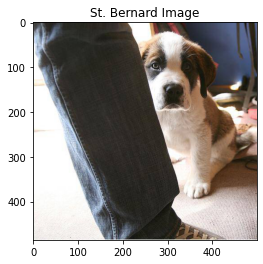

In [32]:
plt.imshow(st_bernard_image)
plt.title("St. Bernard Image")
plt.show()